In [4]:
import os
import sys
sys.path.insert(0,os.path.join('/project/venv/lib/python3.8/site-packages/'))
sys.path.insert(0,os.path.join('/venv/lib/python3.8/site-packages'))

def ignore_user_installs(username):
    ## avoid using user installs
    user_install_path = '/scratch/' + username + '/python/lib/python3.8/site-packages'
    if user_install_path in sys.path:
        sys.path.remove(user_install_path)
        
ignore_user_installs("starzew")

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['HTTP_PROXY'] = 'http://fp.cs.ovgu.de:3210/'
os.environ['HTTPS_PROXY'] = 'http://fp.cs.ovgu.de:3210/'

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import dill



/usr/local/jupyter/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
2025-02-25 11:59:01.766064: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 11:59:01.817326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Code used: https://huggingface.co/blog/fine-tune-whisper

In [ ]:
def load_pkl(file_name):
    with open(file_name, 'rb') as inp:
        data = dill.load(inp)

    return data

In [ ]:
log_hist = load_pkl('/model/log_hist_30.pkl')

In [5]:
pd.DataFrame(log_hist)

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_wer_uaspeech,eval_wer_librispeech,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,9.6518,inf,0.000010,0.002141,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.002141,1,7.997008,239.470899,5.040828,844.1264,7.547,0.944,NaN,NaN,NaN,NaN,NaN
2,9.8800,inf,0.000010,0.004283,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.004283,2,7.997008,239.470899,5.040828,841.9136,7.567,0.947,NaN,NaN,NaN,NaN,NaN
4,9.9704,inf,0.000010,0.006424,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2.1433,37.453735,0.000002,0.062099,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,0.062099,29,2.821090,169.682540,5.187923,835.8379,7.622,0.954,NaN,NaN,NaN,NaN,NaN
58,3.9022,44.212719,0.000001,0.064240,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,0.064240,30,2.802271,172.089947,5.197352,790.8855,8.056,1.008,NaN,NaN,NaN,NaN,NaN


In [8]:
hist1 = []
hist2 = []
for i,hist in enumerate(log_hist):
    if i % 2 == 0:
        hist2.append(hist)
    else:
        hist1.append(hist)

In [9]:
history = pd.DataFrame(hist1).merge(pd.DataFrame(hist2))

In [13]:
history['eval_wer_uaspeech']


0     239.470899
1     239.470899
2     239.470899
3     239.470899
4     237.619048
5     240.661376
6     227.962963
7     237.380952
8     226.640212
9     211.269841
10    202.698413
11    198.835979
12    200.317460
13    194.814815
14    190.899471
15    188.835979
16    188.121693
17    182.645503
18    181.164021
19    177.592593
20    173.015873
21    166.031746
22    168.121693
23    167.936508
24    167.751323
25    166.560847
26    167.142857
27    173.068783
28    169.682540
29    172.089947
30    172.089947
Name: eval_wer_uaspeech, dtype: float64

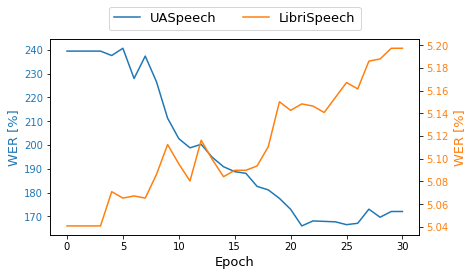

In [ ]:
fig, ax1 = plt.subplots()
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig.set_figwidth(480*px)

color="tab:blue"
fs = 13
history[['eval_wer_uaspeech']].plot(ax=ax1, color=color, label="test", legend=False)
ax1.set_xlabel("Epoch", fontsize=fs)
ax1.set_ylabel("WER [%]", color=color, fontsize=fs)
ax1.tick_params(axis="y", labelcolor=color)

color="tab:orange"
ax2 = ax1.twinx()
history[['eval_wer_librispeech']].plot(ax=ax2, color=color)
ax2.set_ylabel("WER [%]", color=color, fontsize=fs)
ax2.tick_params(axis="y", labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ["UASpeech", "LibriSpeech"], fontsize=fs,loc='upper center', bbox_to_anchor=(0.5, 1.2),ncols=2)


fig.tight_layout()
plt.savefig("/figs/ft.pdf")
plt.show()